In [144]:
from netCDF4 import Dataset
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import re
from pathlib import Path
from scipy.interpolate import griddata
from scipy.spatial import cKDTree




In [145]:
#constants
_HANLE_LAT_ = 32.7908
_HANLE_LON_ = 79.0002


def get_monthly_data(file_name,lat0 = _HANLE_LAT_,lon0 = _HANLE_LON_):

  fh = Dataset(file_name, mode='r')

  lons = fh.variables['lon'][:]
  lats = fh.variables['lat'][:]
  TQV = fh.variables['TQV'][:]
  time = fh.variables['time'][:]

  lat_lon = []
  for x in lats:
    for y in lons:
      lat_lon.append([x,y])

  lat_lon = np.array(lat_lon)

  nearest_coordinate =lat_lon[cKDTree(lat_lon).query([lat0,lon0], k=1)[1]]

  x = np.where(lats==nearest_coordinate[0])
  y = np.where(lons==nearest_coordinate[1])


  PWV = TQV[0][x[0][0]][y[0][0]]

  return PWV,file_name




In [146]:
PWV_DATA = []

files=glob.glob("New Region\*.nc")



for file in files:
    
    file_name = Path(file).stem

    PWV_DATA.append(get_monthly_data(file))

#27 to 33


# plt.figure(figsize=(10,10))

# plt.plot()



C:\Users\TANMAY~1\AppData\Local\Temp/ipykernel_6272/2278609536.py:13: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  time = fh.variables['time'][:]


In [147]:


with open('New Region/PWV_Data.txt', 'w') as f:
    for row in PWV_DATA:
        f.write(str(row))
        f.write('\n')
f.close()

In [148]:
PWV_DATA_FROM_FILE = []
with open('New Region/PWV_Data.txt') as f:
    lines = f.readlines()
    for line in lines:

        PWV_DATA_FROM_FILE.append(line)




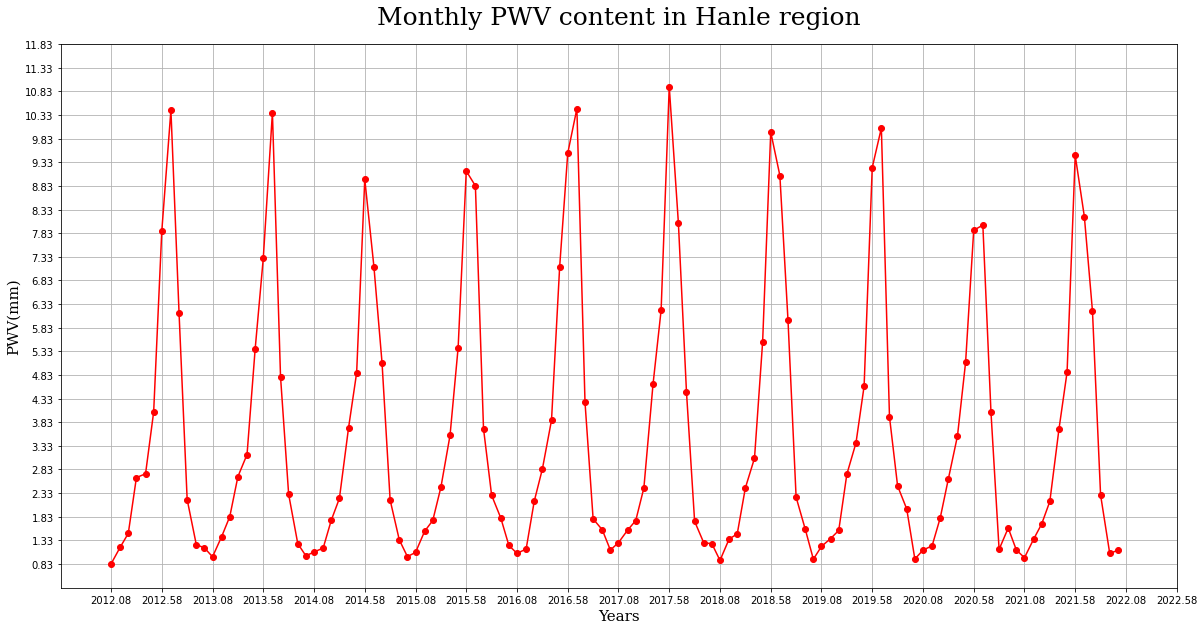

In [161]:

PWV_TUPLE = []


for i in range(len(PWV_DATA_FROM_FILE)):
    data,time = eval(PWV_DATA_FROM_FILE[i])
    PWV_TUPLE.append((round(float(int(time[38:44])//100)+float(int(time[38:44])%100/12),2),
    round(data,3)))

PWV_TUPLE= sorted(PWV_TUPLE)
#print(PWV_TUPLE)

PWV = []
TIME = []

for (file_name,pwv) in PWV_TUPLE:
    PWV= np.append(PWV,pwv)
    TIME= np.append(TIME,file_name)
PWV = np.array(PWV)
TIME = np.array(TIME)
PWV_TUPLE = np.array(PWV_DATA)


PWV_TUPLE_NEW = PWV_TUPLE[-121:-1,:]
TIME_NEW = TIME[-121:-1]
PWV_NEW = PWV[-121:-1]



plt.figure(figsize=(20,10))
plt.plot(TIME_NEW,PWV_NEW,color='red',marker ='o')






#plt.xticks([TIME_NEW[0]])
plt.grid()
plt.xticks(np.arange(min(TIME_NEW), max(TIME_NEW)+1, 0.5))

plt.yticks(np.arange(min(PWV_NEW), max(PWV_NEW)+1, 0.5))
plt.xlabel("Years",size=15,font ='serif')
plt.ylabel("PWV(mm)",size=15,font ='serif')
plt.title("Monthly PWV content in Hanle region", size = 25,pad=20,font ='serif')
plt.savefig("PWV_vs_Time1.png",dpi = 500,bbox_inches = 'tight')

plt.show()


In [164]:
print(time)

New Region\MERRA2_401.instM_2d_int_Nx.202109.nc4.nc


c:\Users\Tanmay Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


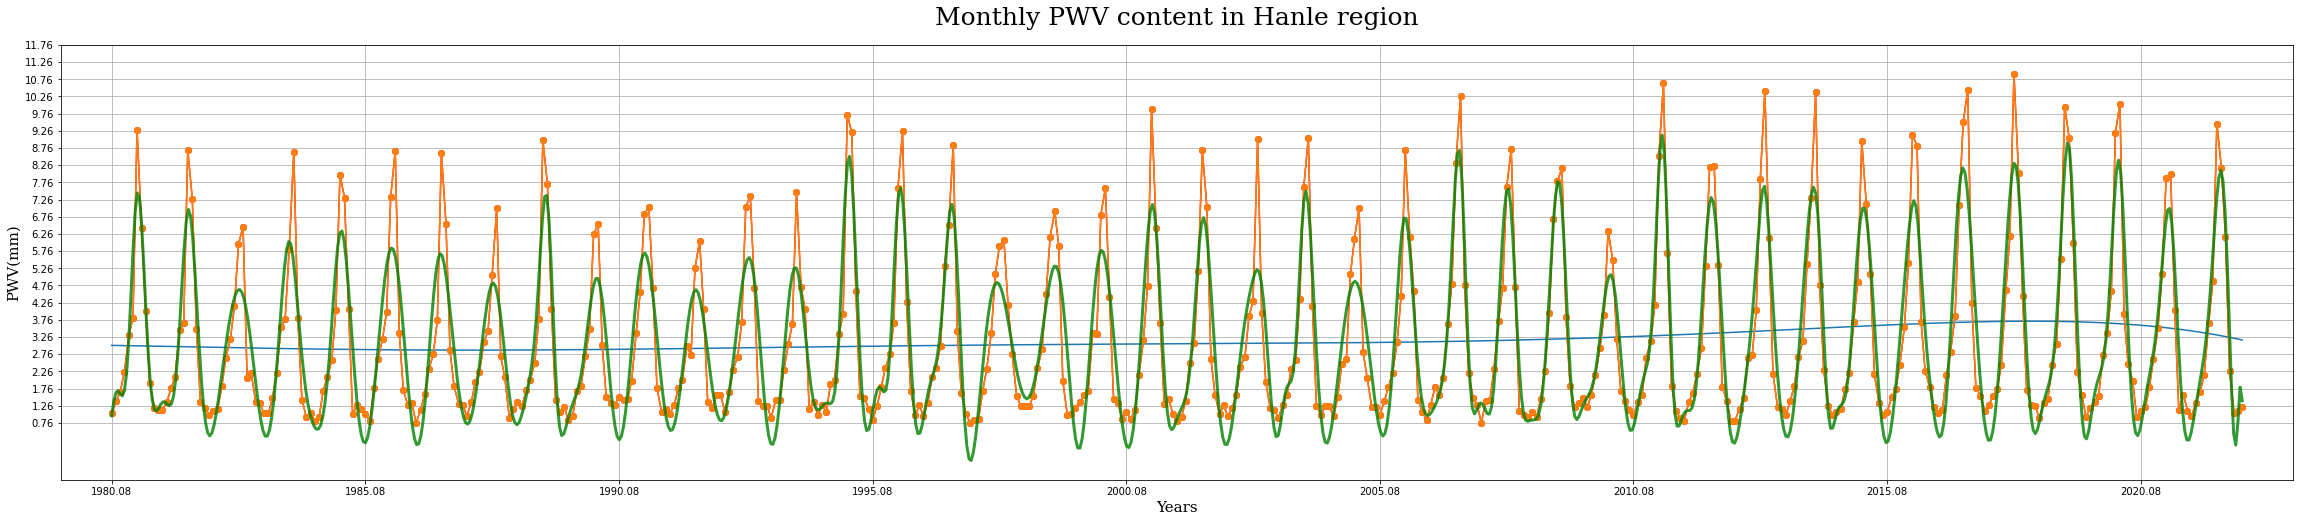

In [211]:
from scipy.interpolate import UnivariateSpline

z = np.polyfit(TIME, PWV, 15)
f = np.poly1d(z)

# calculate new x's and y's
TIME_new = np.linspace(TIME[0], TIME[-1], 500)
PWV_new = f(TIME_new)

plt.figure(figsize=(40,8))
plt.plot(TIME,PWV,color='red',marker ='o')
plt.plot(TIME_new, PWV_new,'-')
plt.xlim([TIME[0]-1, TIME[-1] + 1 ])


spl = UnivariateSpline(TIME, PWV,k =5)
plt.plot(TIME, PWV, marker ='o', alpha = 1)
xs = np.linspace(min(TIME), max(TIME), 1000)
plt.plot(xs, spl(xs), 'g', lw=3, alpha=0.8)



plt.grid()
plt.xticks(np.arange(min(TIME), max(TIME)+1, 5))

plt.yticks(np.arange(min(PWV), max(PWV)+1, 0.5))
plt.xlabel("Years",size=15,font ='serif')
plt.ylabel("PWV(mm)",size=15,font ='serif')
plt.title("Monthly PWV content in Hanle region", size = 25,pad=20,font ='serif')
plt.savefig("PWV_vs_Time1.png",dpi = 500,bbox_inches = 'tight')

plt.show()

c:\Users\Tanmay Singh\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


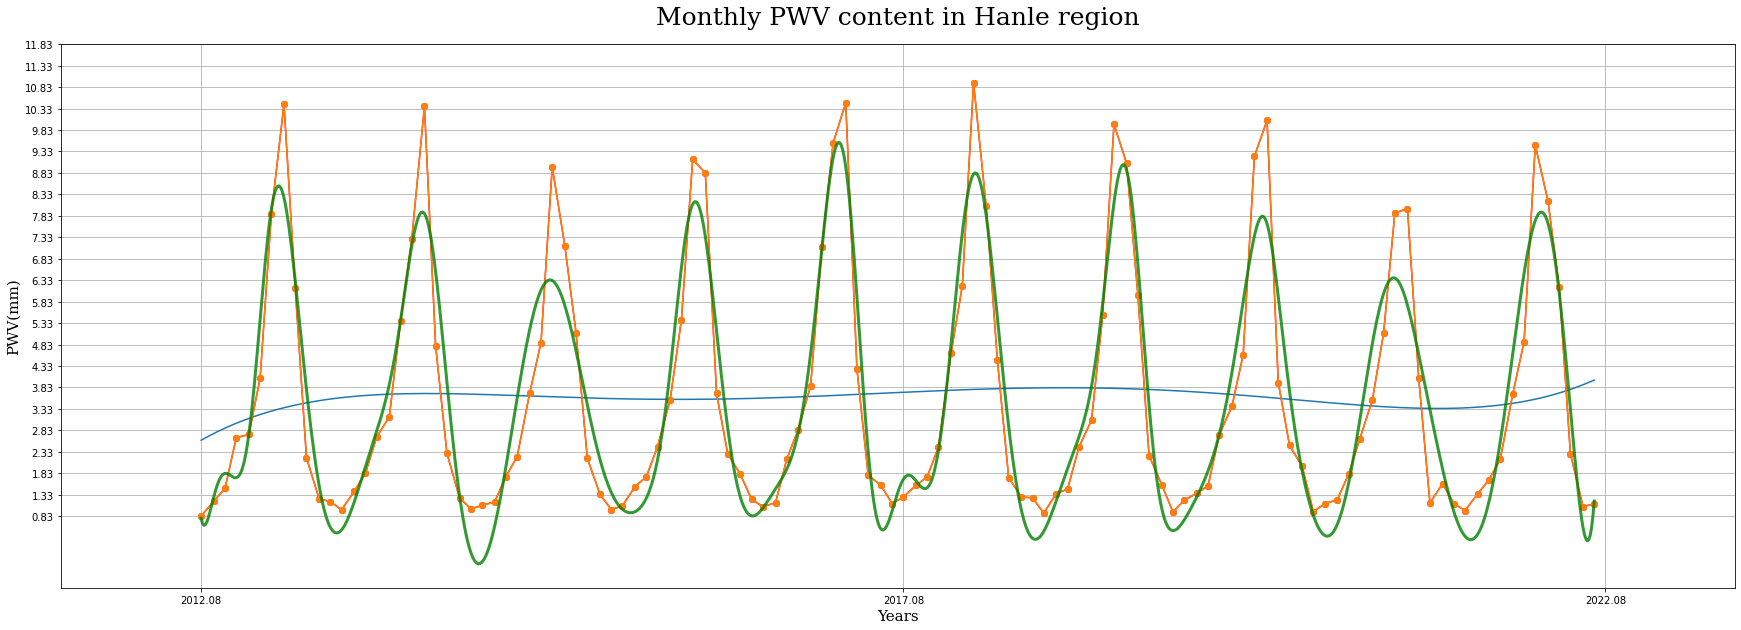

In [214]:
z = np.polyfit(TIME_NEW, PWV_NEW, 15)
f = np.poly1d(z)

# calculate new x's and y's
TIME_new = np.linspace(TIME_NEW[0], TIME_NEW[-1], 500)
PWV_new = f(TIME_new)

plt.figure(figsize=(30,10))
plt.plot(TIME_NEW,PWV_NEW,color='red',marker ='o')
plt.plot(TIME_new, PWV_new,'-')
plt.xlim([TIME_NEW[0]-1, TIME_NEW[-1] + 1 ])


spl = UnivariateSpline(TIME_NEW, PWV_NEW,k =5)
plt.plot(TIME_NEW, PWV_NEW, marker ='o', alpha = 1)
xs = np.linspace(min(TIME_NEW), max(TIME_NEW), 1000)
plt.plot(xs, spl(xs), 'g', lw=3, alpha=0.8)



plt.grid()
plt.xticks(np.arange(min(TIME_NEW), max(TIME_NEW)+1, 5))

plt.yticks(np.arange(min(PWV_NEW), max(PWV_NEW)+1, 0.5))
plt.xlabel("Years",size=15,font ='serif')
plt.ylabel("PWV(mm)",size=15,font ='serif')
plt.title("Monthly PWV content in Hanle region", size = 25,pad=20,font ='serif')
plt.savefig("PWV_vs_Time1.png",dpi = 500,bbox_inches = 'tight')

plt.show()